# Elijah Sartin and Richard Osborn
## DS160 Final Project Data Set
### Version 1.0.0

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#Provides a way to split the data into train and test data sets.
from sklearn.model_selection import train_test_split 

#Provides a way to calculate metrics on the model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#from sklearn.metrics import roc_curve,  roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
# Decision Tree model from SKLearn
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier

Had to use 'sep=';' so that the data would be read in properly

In [2]:
df=pd.read_csv('bank-additional.csv',sep=';')

Checking the shape of the data. This has 4119 samples and 21 columns.

In [3]:
print(df.shape)

(4119, 21)


In [4]:
df.sample(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
607,58,retired,divorced,high.school,no,yes,no,cellular,jun,tue,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.262,5076.2,no
2434,26,blue-collar,married,basic.9y,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.864,5228.1,no
1242,31,admin.,married,university.degree,no,yes,no,telephone,may,thu,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,no
2072,41,technician,married,professional.course,no,no,no,cellular,apr,fri,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,no
2140,30,technician,single,university.degree,no,yes,no,cellular,jun,fri,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.268,5076.2,yes


Discovering what type of data each column is

In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

We are dropping columns that we were not going to be using for testing, this will allow our data to proccess faster and clean the data.

In [7]:
 df.drop(df.columns[[8, 9, 10, 12, 13, 14, 15, 17, 19]], 
   axis = 1, inplace = True)


In [8]:
df = df.dropna()

Renaming the consumer price index and euribor 3 month rate to make it easier to type the column names.

In [9]:
df.rename(columns={"cons.price.idx":"cpi"},inplace=True)
df.rename(columns={"euribor3m":"eu3"},inplace=True)

In [10]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'campaign', 'cpi', 'eu3', 'y'],
      dtype='object')

Seeing what missing data was dropped and it appears as none was since the sample is still 4119

In [82]:
print(df.shape)

(4119, 12)


For most of the categories, we created a groupby with the count so that we could see specific distributions. We also created distribution graphs that showed us the distributions with clients on the y axis.

In [84]:
age=df.age.groupby(df.age).count()
age

age
18     3
19     1
20     4
21     7
22    10
      ..
81     3
82     2
85     1
86     2
88     1
Name: age, Length: 67, dtype: int64

This is relatively normally distributed, with a few outliers past age 65.

Text(0, 0.5, 'Number of Clients')

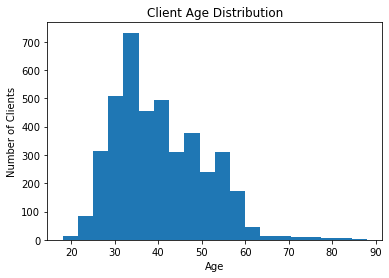

In [13]:
plt.hist(df.age,bins=20) 
plt.title('Client Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Clients')

In [86]:
campaign=df.campaign.groupby(df.campaign).count()
campaign

campaign
1     1764
2     1039
3      549
4      291
5      142
6       99
7       60
8       36
9       32
10      20
11      19
12      16
13      11
14       6
15       2
16       7
17      14
18       1
19       2
22       2
23       2
24       1
27       1
29       2
35       1
Name: campaign, dtype: int64

Text(0, 0.5, 'Number of Clients')

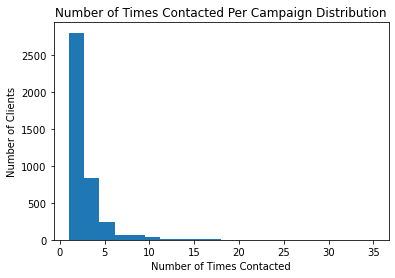

In [87]:
plt.hist(df.campaign,bins=20) 
plt.title('Number of Times Contacted Per Campaign Distribution')
plt.xlabel('Number of Times Contacted')
plt.ylabel('Number of Clients')

In [88]:
job=df.job.groupby(df.job).count()
job

job
admin.           1012
blue-collar       884
entrepreneur      148
housemaid         110
management        324
retired           166
self-employed     159
services          393
student            82
technician        691
unemployed        111
unknown            39
Name: job, dtype: int64

Changed the orientation to landscape so that the axis would be legible.

<BarContainer object of 12 artists>

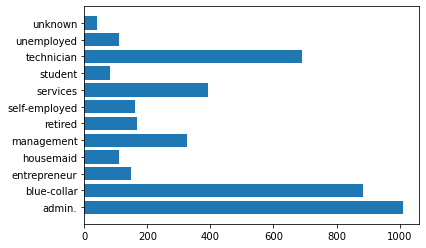

In [19]:
plt.barh(job.index,job.values) 

In [89]:
marital=df.marital.groupby(df.marital).count()
marital

marital
divorced     446
married     2509
single      1153
unknown       11
Name: marital, dtype: int64

<BarContainer object of 4 artists>

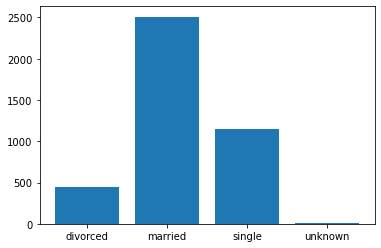

In [21]:
plt.bar(marital.index,marital.values)

In [90]:
education=df.education.groupby(df.education).count()
education

education
basic.4y                429
basic.6y                228
basic.9y                574
high.school             921
illiterate                1
professional.course     535
university.degree      1264
unknown                 167
Name: education, dtype: int64

<BarContainer object of 8 artists>

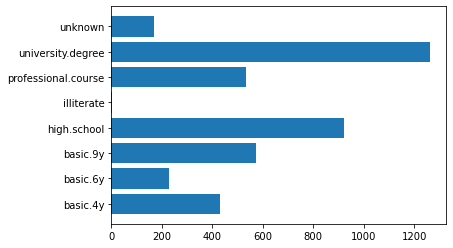

In [23]:
plt.barh(education.index,education.values)

Only one person had answered that they had defaulted on the loan. We suspect that it could be do to not wanting to admit something like that to a telemarketer or they were not asked.

In [91]:
default=df.default.groupby(df.default).count()
default

default
no         3315
unknown     803
yes           1
Name: default, dtype: int64

<BarContainer object of 3 artists>

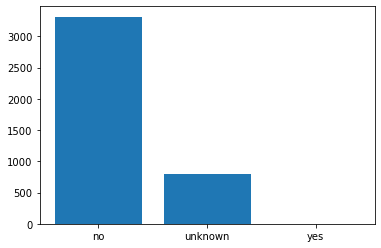

In [92]:
plt.bar(default.index,default.values)

This is the people who have a housing loan.

In [26]:
housing=df.housing.groupby(df.housing).count()
housing

housing
no         1839
unknown     105
yes        2175
Name: housing, dtype: int64

<BarContainer object of 3 artists>

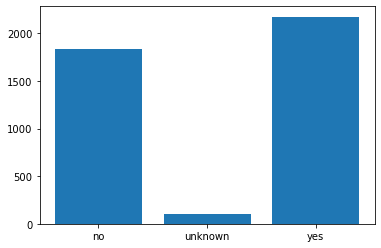

In [27]:
plt.bar(housing.index,housing.values)

This is the people who have a personal loan.

In [93]:
loan=df.loan.groupby(df.loan).count()
loan

loan
no         3349
unknown     105
yes         665
Name: loan, dtype: int64

<BarContainer object of 3 artists>

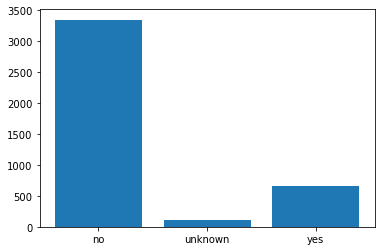

In [29]:
plt.bar(loan.index,loan.values)

The method of phone contact.

In [94]:
contact=df.contact.groupby(df.contact).count()
contact

contact
cellular     2652
telephone    1467
Name: contact, dtype: int64

<BarContainer object of 2 artists>

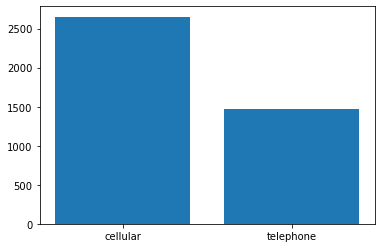

In [31]:
plt.bar(contact.index,contact.values)

One important thing we did here was not name the groupby y. This would have caused us further complications when using the machine learning models.

In [95]:
p=df.y.groupby(df.y).count() #IMPORTANT
p

y
0    3668
1     451
Name: y, dtype: int64

Text(0, 0.5, 'Number of Clients')

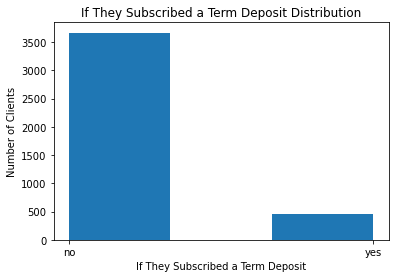

In [38]:
plt.hist(df.y,bins=3)
plt.title('If They Subscribed a Term Deposit Distribution')
plt.xlabel('If They Subscribed a Term Deposit')
plt.ylabel('Number of Clients')

The consumer price index (CPI) is cost of an average basket of goods for the average household. If this is above 100% then that means there was inflation when compared to the base year (which is not known for our case) and if below 100%, that means there was deflation. All of the CPI's were under 95.

In [96]:
cpi=df.cpi.groupby(df.cpi).count()
cpi

cpi
92.201     75
92.379     25
92.431     43
92.469     14
92.649     36
92.713     21
92.756      1
92.843     25
92.893    597
92.963     75
93.075    201
93.200    386
93.369     23
93.444    528
93.749     14
93.798      6
93.876     23
93.918    667
93.994    758
94.027     33
94.055     24
94.199     39
94.215     30
94.465    431
94.601     20
94.767     24
Name: cpi, dtype: int64

Text(0, 0.5, 'Number of Clients')

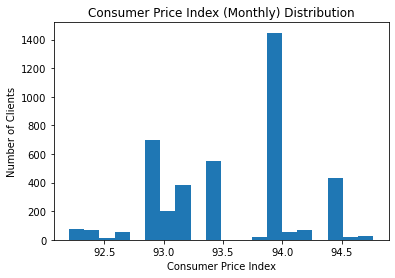

In [97]:
plt.hist(df.cpi,bins=20) 
plt.title('Consumer Price Index (Monthly) Distribution')
plt.xlabel('Consumer Price Index')
plt.ylabel('Number of Clients')

The basic descriptive statistics of the numeric variables that will be used in our machine learning.

In [99]:
df.describe()

,age,campaign,cpi,eu3,y
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,2.537266,93.579704,3.621356,0.109493
std,10.313362,2.568159,0.579349,1.733591,0.312294
min,18.000000,1.000000,92.201000,0.635000,0.000000
25%,32.000000,1.000000,93.075000,1.334000,0.000000
50%,38.000000,2.000000,93.749000,4.857000,0.000000
75%,47.000000,3.000000,93.994000,4.961000,0.000000
max,88.000000,35.000000,94.767000,5.045000,1.000000


Defining cor as the correlation table so that I can use it in the heatmap

In [102]:
cor=df.corr()

The heatmap shows a lot of low correlation, this is why we decided to test with these variables

<AxesSubplot:>

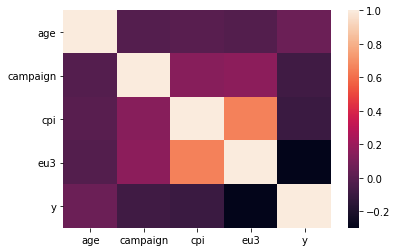

In [104]:
sns.heatmap(cor)

Running pair plots, notice that we excluded the EU3 rate since the graphs did not have any practical information.

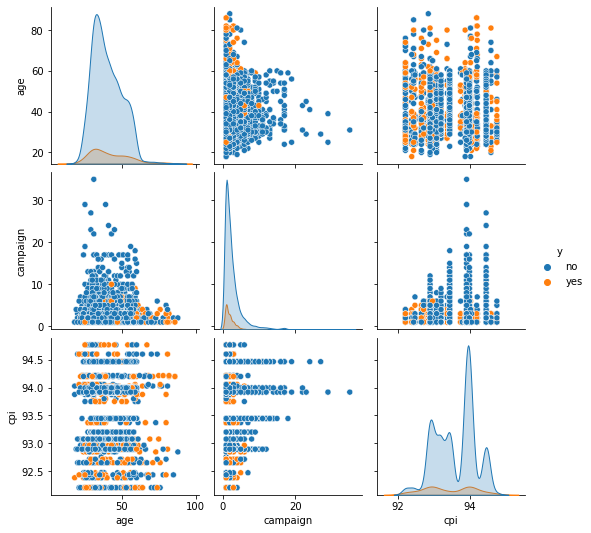

In [50]:
sns.pairplot(df[['age','campaign','cpi','y']], hue='y') #comparisons

Turning the output group, 'y', into 0's and 1's so that we could use it as the test variable for our machine learning.

In [105]:
y = df['y']
y.replace('yes',1,inplace=True)
y.replace('no',0,inplace=True)
y = np.array(y)

In [53]:
df.y.groupby(df.y).count()

y
0    3668
1     451
Name: y, dtype: int64

Setting the the data that we want to train and test with. Y is our output and X is the data that will be tested.

In [54]:
X = df.loc(axis=1)['age','campaign','cpi','eu3']
y = df['y']

We are doing an 80/20 split with Decision Tree. We will keep random state=30 for all of the tests and will be using the raw data.

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=.20, 
                                                    random_state=30)

Fitting the data so that the model will predict 

In [57]:
#clf = tree.DecisionTreeClassifier()
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                 max_depth=5)
clf = clf.fit(X_train, y_train)

In [58]:
y_pred=clf.predict(X_test)

Creating a function that allows us to create the confusion matrix faster each time, the confusion matrix tells us the false positives, true falses, true positives, and false negatives.

In [59]:
def plot_cm(y_pred, y_test):
    cm = confusion_matrix(y_pred, y_test)
    fig = plt.figure(figsize=(5,5))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')

### 80/20 Decision Tree

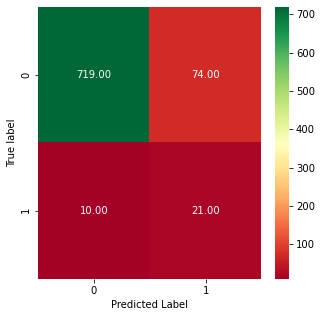

In [60]:
plot_cm(y_pred, y_test)

The classification report shows the overall accuracy of the model with those parameters, with ours being at 90% for this test

In [61]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.91      0.94       793
           1       0.22      0.68      0.33        31

    accuracy                           0.90       824
   macro avg       0.60      0.79      0.64       824
weighted avg       0.96      0.90      0.92       824



Repeating the same process but renaming and changing the test size to 70/30

In [62]:
X1 = df.loc(axis=1)['age','campaign','cpi','eu3']
y1 = df['y']

In [63]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1, 
                                                    test_size=.30, 
                                                    random_state=30)

In [64]:
#clf = tree.DecisionTreeClassifier()
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                 max_depth=5)
clf = clf.fit(X1_train, y1_train)

In [65]:
y1_pred=clf.predict(X1_test)

### 70/30 Decision Tree

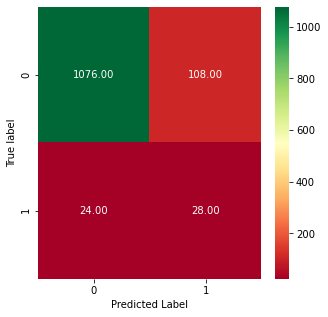

In [66]:
plot_cm(y1_pred, y1_test)

This report gave us slightly less accuracy and precision, but the support was greater which decreased the f1 score for if they subscribed to a term deposit. 

In [67]:
print(classification_report(y1_pred,y1_test))

              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1184
           1       0.21      0.54      0.30        52

    accuracy                           0.89      1236
   macro avg       0.59      0.72      0.62      1236
weighted avg       0.95      0.89      0.92      1236



In [68]:
Xa = df.loc(axis=1)['age','campaign','cpi','eu3']
ya = df['y']

In [69]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa,ya, 
                                                    test_size=.20, 
                                                    random_state=30)

In [70]:
clf = RandomForestClassifier(n_estimators=250,
                            criterion='entropy')
clf.fit(Xa_train,np.ravel(ya_train))

RandomForestClassifier(criterion='entropy', n_estimators=250)

In [71]:
ya_pred = clf.predict(Xa_test)

### 80/20 Random Forest

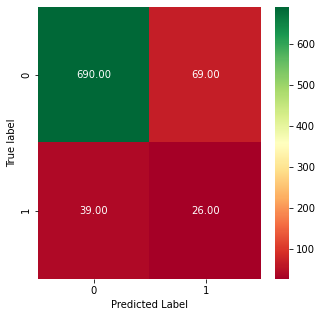

In [72]:
plot_cm(ya_pred, ya_test)

In [73]:
print(classification_report(ya_pred,ya_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       759
           1       0.27      0.40      0.33        65

    accuracy                           0.87       824
   macro avg       0.61      0.65      0.63       824
weighted avg       0.89      0.87      0.88       824



In [74]:
Xb = df.loc(axis=1)['age','campaign','cpi','eu3']
yb = df['y']

In [75]:
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb,yb, 
                                                    test_size=.30, 
                                                    random_state=30)

Will be switching to random forest and running the same tests to compare the results.

In [107]:
clf = RandomForestClassifier(n_estimators=250,
                            criterion='entropy')
clf.fit(Xb_train,np.ravel(yb_train))

RandomForestClassifier(criterion='entropy', n_estimators=250)

In [77]:
yb_pred = clf.predict(Xb_test)

### 70/30 Random Forest

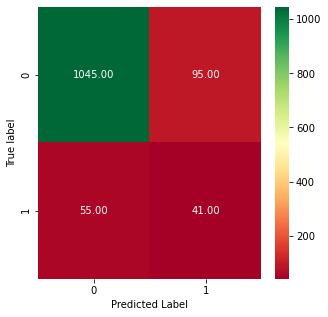

In [80]:
plot_cm(yb_pred, yb_test)

In [81]:
print(classification_report(yb_pred,yb_test))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93      1140
           1       0.30      0.43      0.35        96

    accuracy                           0.88      1236
   macro avg       0.63      0.67      0.64      1236
weighted avg       0.90      0.88      0.89      1236

